# Experiment 5. Иcпользование модели TabNet

## Цель эксперимента

Цель данного эксперимента заключается в оценке влияния обработки пропусков на производительность модели машинного обучения. Мы будем использовать `SimpleImputer` для заполнения пропусков в данных, а затем обучим простую нейронную сеть с использованием библиотеки PyTorch.

## Описание данных

Данные загружаются из файла `processed_application_train.csv`, который содержит информацию о заявках. Целевая переменная обозначена как `target`, и мы будем использовать остальные столбцы в качестве признаков для обучения модели.

## Процесс эксперимента

1. **Загрузка данных**: Данные загружаются из CSV файла с использованием библиотеки pandas.

2. **Обработка пропусков**: 
   - Для заполнения пропусков в данных используется `SimpleImputer` с стратегией `most_frequent`, что позволяет заменить пропуски наиболее частым значением в каждом столбце.
   
3. **Разделение данных**: Данные разделяются на обучающую и тестовую выборки с использованием `train_test_split` из библиотеки scikit-learn.

4. **Стандартизация данных**: Признаки стандартизируются с помощью `StandardScaler`, чтобы привести их к одному масштабу.

5. **Создание тензоров**: Данные преобразуются в тензоры PyTorch для дальнейшего использования в модели.

6. **Определение модели**: Создается простая нейронная сеть с двумя скрытыми слоями и выходным слоем с активацией сигмоид для бинарной классификации.

7. **Обучение модели**: Модель обучается на обучающей выборке с использованием бинарной кросс-энтропии в качестве функции потерь и Adam в качестве оптимизатора.

8. **Оценка модели**: После обучения модель оценивается на тестовой выборке, и вычисляется точность предсказаний.

## Результаты

В результате эксперимента мы получим значение точности модели на тестовой выборке, что позволит оценить, насколько эффективно заполнение пропусков повлияло на производительность модели.

## Заключение

Данный эксперимент поможет понять, как обработка пропусков в данных влияет на качество предсказаний модели. Результаты могут быть использованы для дальнейших улучшений в предобработке данных и выборе моделей.


In [1]:
pip install pytorch-tabnet

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%load_ext autoreload
%autoreload 2

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from utils.roc_auc import plot_roc_curve

In [3]:
target_column = 'TARGET'

In [4]:
data = pd.read_csv("./data/processed_data/processed_application_train.csv", index_col=0)

# Предположим, что 'target' - это целевая переменная
X = data.drop(columns=[target_column])
y = data[target_column].values

# Обработка пропусков с помощью SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score

# Обучение модели TabNet
tabnet_model = TabNetClassifier()
tabnet_model.fit(X_train, y_train, 
                            eval_set=[(X_test, y_test)], 
                            eval_name=['test'], 
                            eval_metric=['auc'],  # Используем ROC AUC в качестве метрики
                            max_epochs=100, 
                            patience=10)

# Оценка модели
y_pred = tabnet_model.predict(X_test)

# Вычисление точности
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.4f}')

# Вычисление ROC AUC
y_pred_proba = tabnet_model.predict_proba(X_test)[:, 1]  # Получаем вероятности для положительного класса
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')

epoch 0  | loss: 0.2866  | test_auc: 0.68559 |  0:00:12s
epoch 1  | loss: 0.26138 | test_auc: 0.7116  |  0:00:26s
epoch 2  | loss: 0.25897 | test_auc: 0.71786 |  0:00:39s
epoch 3  | loss: 0.25727 | test_auc: 0.71404 |  0:00:51s
epoch 4  | loss: 0.25848 | test_auc: 0.71711 |  0:01:03s
epoch 5  | loss: 0.25725 | test_auc: 0.72534 |  0:01:16s
epoch 6  | loss: 0.25545 | test_auc: 0.73213 |  0:01:27s
epoch 7  | loss: 0.25402 | test_auc: 0.73127 |  0:01:39s
epoch 8  | loss: 0.25321 | test_auc: 0.73466 |  0:01:52s
epoch 9  | loss: 0.25275 | test_auc: 0.73921 |  0:02:04s
epoch 10 | loss: 0.25173 | test_auc: 0.73955 |  0:02:17s
epoch 11 | loss: 0.25167 | test_auc: 0.74121 |  0:02:30s
epoch 12 | loss: 0.25105 | test_auc: 0.74195 |  0:02:43s
epoch 13 | loss: 0.25036 | test_auc: 0.7432  |  0:02:55s
epoch 14 | loss: 0.24994 | test_auc: 0.74341 |  0:03:08s
epoch 15 | loss: 0.24954 | test_auc: 0.74366 |  0:03:21s
epoch 16 | loss: 0.24916 | test_auc: 0.74373 |  0:03:34s
epoch 17 | loss: 0.24856 | test

/Users/pelageya/Library/Python/3.9/lib/python/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9197
ROC AUC: 0.7442


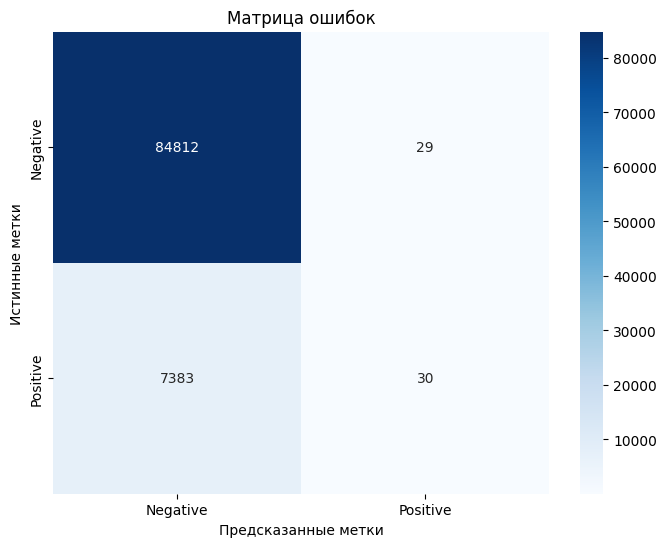

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица ошибок')
plt.show()

Нейросеть не будем обучать в несколько итераций для проведения т-теста, так как это требует значительных вычислительных ресурсов и времени. Кроме того в этом нет большого смысла потому что метрика не лучше чем у градиентных бустингов